In [17]:
import pandas as pd
import eurostat

In [18]:
df = eurostat.get_data_df(code="PRC_HICP_MANR", filter_pars={
                          "geo": "fr", "coicop": "CP00"})
df = df.rename(columns={'geo\TIME_PERIOD': 'geo'})

In [19]:
df = df.drop(['freq', 'unit', 'coicop', 'geo'], axis=1)

In [20]:
df = df.melt(var_name='TIME_PERIOD', value_name='OBS_VALUE')

C:\Users\maxen\AppData\Local\Temp\ipykernel_13116\2858450365.py:42: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('saved_figs/figure1.png', dpi=500)
C:\Users\maxen\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


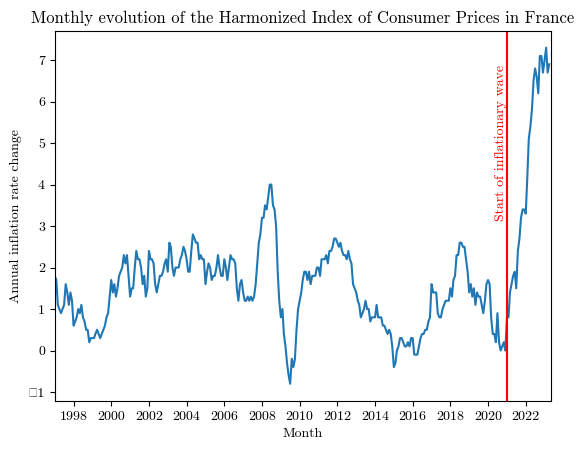

In [21]:
import matplotlib.pyplot as plt
from datetime import date
from matplotlib.dates import YearLocator
from matplotlib.dates import date2num



# Convertir la colonne "TIME_PERIOD" en un objet de type date
df["TIME_PERIOD"] = pd.to_datetime(df["TIME_PERIOD"])

# Définir la colonne "TIME_PERIOD" comme l'index du DataFrame
df.set_index("TIME_PERIOD", inplace=True)

# Créer un graphique avec "TIME_PERIOD" en abscisse et "OBS_VALUE" en ordonnée
plt.plot(df.index, df["OBS_VALUE"])

# Ajouter des labels pour les axes x et y
plt.xlabel("Month")
plt.ylabel("Annual inflation rate change")

# Limiter l'affichage des valeurs de l'axe x jusqu'à mars 2023
limite_x = date(2023, 5, 1)  # Créer un objet de type date pour mars 2023
plt.xlim(df.index.min(), limite_x)  # Définir la limite de l'axe x

# Définir des intervalles annuels sur l'axe x
annee_locator = YearLocator(2)
plt.gca().xaxis.set_major_locator(annee_locator)

# Convertir la date "2021-01" en un nombre pour l'axe des abscisses
x_position = date2num(pd.Timestamp("2021-01"))

# Tracer une ligne verticale au moment de janvier 2021
plt.axvline(x_position, color="red")

# Add text to the graph to the left of the vertical line
plt.text(x_position - 5, 5, "Start of inflationary wave", rotation=90,
         fontsize=10, color="red", ha="right", va="center")

plt.title("Monthly evolution of the Harmonized Index of Consumer Prices in France")

plt.rcParams['font.family'] = 'cmr10'
plt.savefig('saved_figs/figure1.png', dpi=500)

plt.show()